In [685]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [686]:
!pip install pandas

In [687]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

# **Question 1**


In [688]:
df = pd.read_csv('penguins.csv')

## 1)

### **1A ) Preprocessing**



In [689]:
df.shape

(344, 8)

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


In [691]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [692]:
df = df.dropna()
df.shape

(333, 8)

In [693]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### **1B ) Visualisation**

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


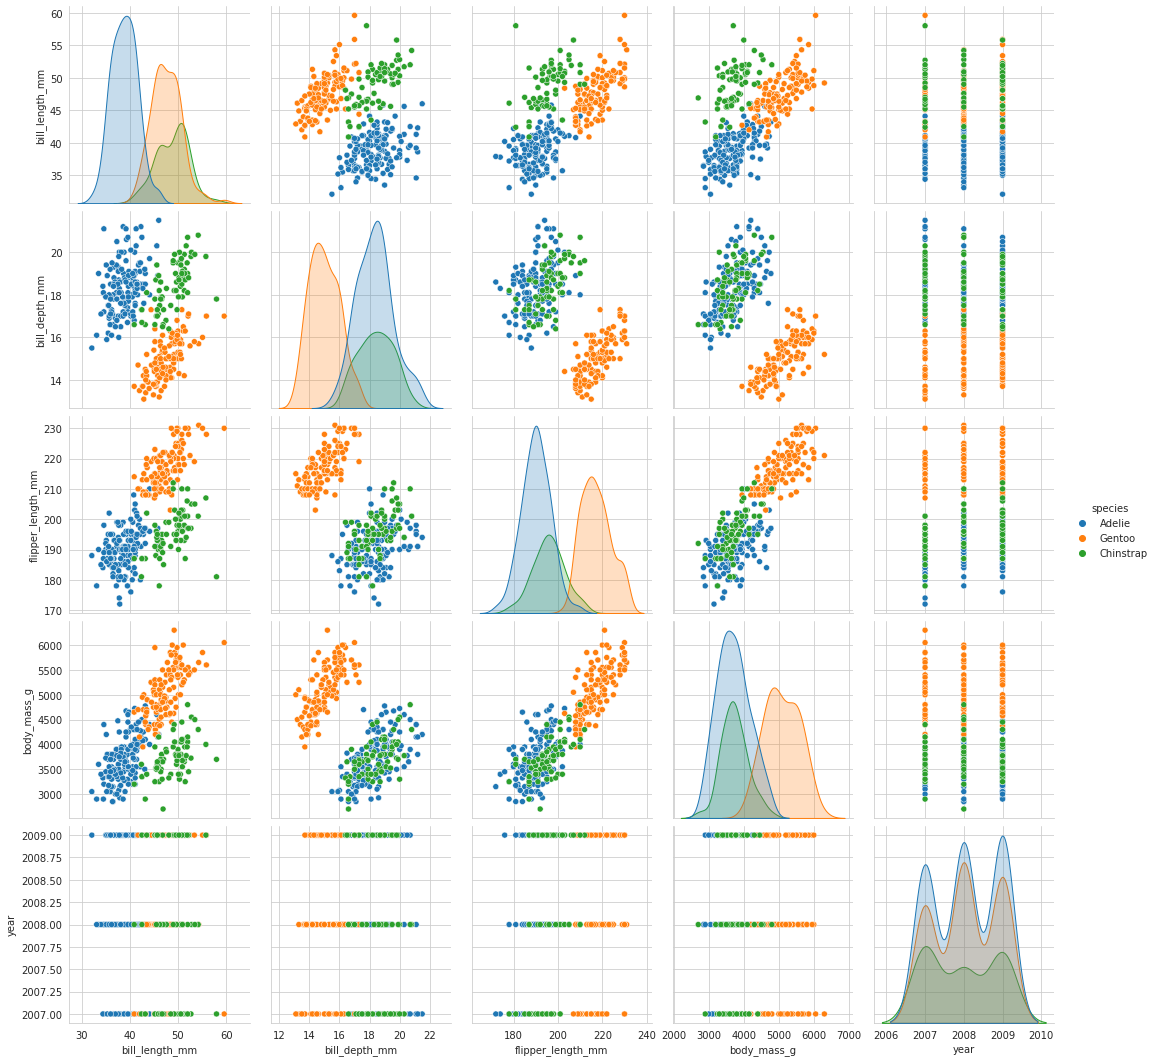

In [695]:
sns.set_style("whitegrid");
sns.pairplot(df, hue="species", size=3);
plt.show()
#bill-length can be used to classify the data

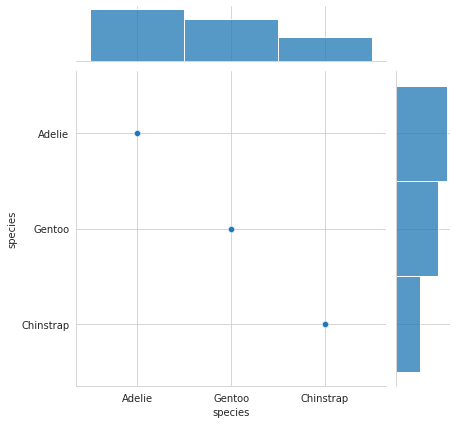

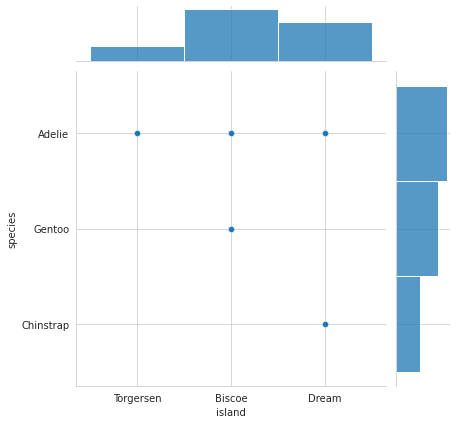

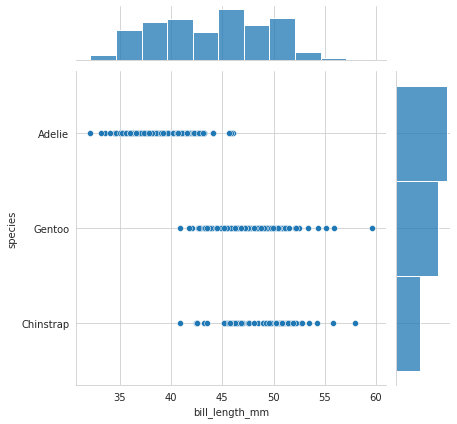

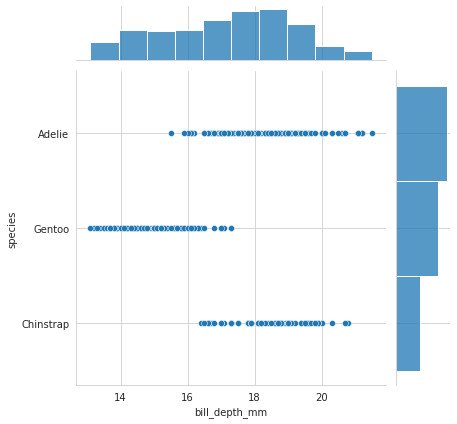

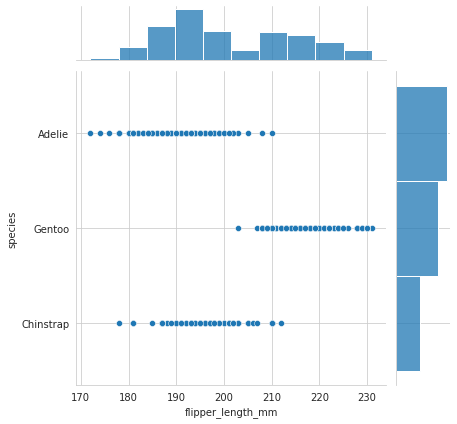

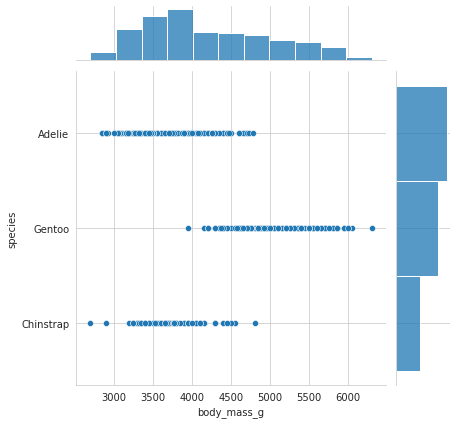

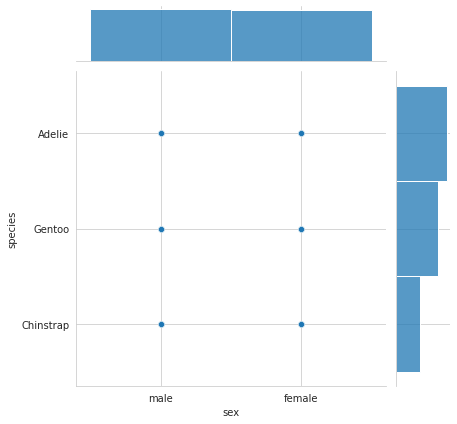

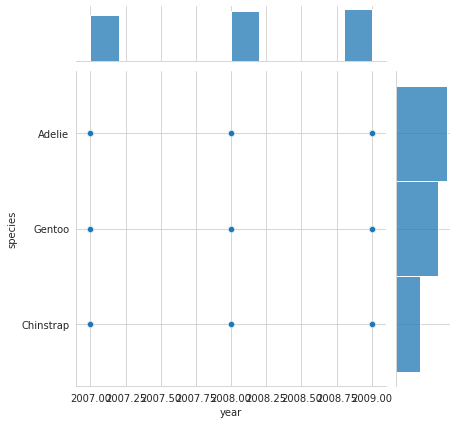

In [696]:
for i in df.columns:
  sns.jointplot(x = df[i], y = df['species'], kind = 'scatter')

### **1C ) Categorical Encoding and Train-Test Split**



In [697]:
# printing number of unique values in each column
df.nunique(axis=0)

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
year                   3
dtype: int64

In [698]:
# printing unique values in each column
column_list = df.columns.values.tolist()
for column_name in column_list:
    print(df[column_name].unique())

['Adelie' 'Gentoo' 'Chinstrap']
['Torgersen' 'Biscoe' 'Dream']
[39.1 39.5 40.3 36.7 39.3 38.9 39.2 41.1 38.6 34.6 36.6 38.7 42.5 34.4
 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5 37.9 37.2 40.9 36.4 42.2
 37.6 39.8 36.5 40.8 36.  44.1 37.  39.6 42.3 40.1 35.  42.  34.5 41.4
 39.  35.7 41.3 41.6 35.5 41.8 33.5 39.7 45.8 42.8 36.2 42.1 42.9 35.1
 37.3 36.3 36.9 38.3 34.  38.1 33.1 43.2 41.  45.6 42.7 40.2 35.2 41.5
 38.5 43.1 36.8 37.5 35.6 32.1 40.7 46.1 50.  48.7 47.6 46.5 45.4 46.7
 43.3 46.8 49.  45.5 48.4 49.3 49.2 46.2 50.2 45.1 46.3 47.8 48.2 47.3
 59.6 49.1 42.6 44.4 44.  49.6 45.3 50.5 43.6 44.9 45.2 46.6 48.5 50.1
 45.  43.8 50.4 45.7 54.3 49.8 49.5 43.5 50.7 47.7 46.4 48.6 47.5 51.1
 52.5 47.4 50.8 43.4 51.3 52.1 52.2 44.5 49.4 46.9 55.9 47.2 41.7 53.4
 48.1 51.5 55.1 48.8 49.9 52.7 51.7 47.  52.  45.9 50.3 58.  42.4 50.6
 52.8 54.2 51.  49.7 53.5 50.9 51.4 51.9 55.8]
[18.7 17.4 18.  19.3 20.6 17.8 19.6 17.6 21.2 21.1 19.  20.7 18.4 21.5
 18.3 19.2 18.1 17.2 18.9 18.6 17.9 16

In [699]:
# performing categorical encoding 
df = df.replace({'sex': {'female': 1, 'male': 0}})
df = df.replace({'island': {'Torgersen': 2, 'Biscoe': 1, 'Dream':0}})
df = df.replace({'species': {'Adelie': 2, 'Gentoo': 1, 'Chinstrap':0}})
df = df.replace({'year': {2009: 2, 2008: 1, 2007:0}})

In [700]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,2,2,39.1,18.7,181.0,3750.0,0,0
1,2,2,39.5,17.4,186.0,3800.0,1,0
2,2,2,40.3,18.0,195.0,3250.0,1,0
4,2,2,36.7,19.3,193.0,3450.0,1,0
5,2,2,39.3,20.6,190.0,3650.0,0,0


In [701]:
from sklearn.model_selection import train_test_split
# target variable is Y(last column) so splitting it accordingly, tree uses numpy values hence converting to a numpy array
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,train_size=0.8,random_state=53)


In [702]:
X_train

array([[0.000e+00, 5.030e+01, 2.000e+01, ..., 3.300e+03, 0.000e+00,
        0.000e+00],
       [1.000e+00, 4.750e+01, 1.400e+01, ..., 4.875e+03, 1.000e+00,
        2.000e+00],
       [1.000e+00, 4.620e+01, 1.490e+01, ..., 5.300e+03, 0.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 4.330e+01, 1.400e+01, ..., 4.575e+03, 1.000e+00,
        2.000e+00],
       [0.000e+00, 4.240e+01, 1.730e+01, ..., 3.600e+03, 1.000e+00,
        0.000e+00],
       [0.000e+00, 3.950e+01, 1.670e+01, ..., 3.250e+03, 1.000e+00,
        0.000e+00]])

## 2)

In [703]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,2,2,39.1,18.7,181.0,3750.0,0,0
1,2,2,39.5,17.4,186.0,3800.0,1,0
2,2,2,40.3,18.0,195.0,3250.0,1,0
4,2,2,36.7,19.3,193.0,3450.0,1,0
5,2,2,39.3,20.6,190.0,3650.0,0,0


In [704]:
# calculating gini index
def gini_index(y):
    gini_index = 0
    labels = np.unique(y)
    for cls in labels:
        p = len(y[y == cls]) / len(y)
        gini_index += p**2
    return 1 - gini_index
    # p = y.value_counts()/y.shape[0]
    # gini_index = 1-np.sum(p**2)
    # return(gini_index)

#information gain for two subtrees
def info_gain(parent, l_child, r_child):
        giniGain = gini_index(parent) - ((len(l_child) / len(parent))*gini_index(l_child) + (len(r_child) / len(parent))*gini_index(r_child))
        return giniGain

#information gain for three subtrees
def info_gain1(parent, l_child, r_child,m_child):     
        giniGain = gini_index(parent) - ((len(l_child) / len(parent))*gini_index(l_child) + (len(m_child) / len(parent))*gini_index(m_child) + (len(r_child) / len(parent))*gini_index(r_child))
        return giniGain


## 3)

In [705]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,2,2,39.1,18.7,181.0,3750.0,0,0
1,2,2,39.5,17.4,186.0,3800.0,1,0
2,2,2,40.3,18.0,195.0,3250.0,1,0
4,2,2,36.7,19.3,193.0,3450.0,1,0
5,2,2,39.3,20.6,190.0,3650.0,0,0
...,...,...,...,...,...,...,...,...
339,0,0,55.8,19.8,207.0,4000.0,0,2
340,0,0,43.5,18.1,202.0,3400.0,1,2
341,0,0,49.6,18.2,193.0,3775.0,0,2
342,0,0,50.8,19.0,210.0,4100.0,0,2


In [706]:
cont = ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']
df.describe()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,1.234234,0.771772,43.992793,17.164865,200.966967,4207.057057,0.495495,1.042042
std,0.767820,0.678088,5.468668,1.969235,14.015765,805.215802,0.500732,0.812944
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000,0.000000
25%,1.000000,0.000000,39.500000,15.600000,190.000000,3550.000000,0.000000,0.000000
50%,1.000000,1.000000,44.500000,17.300000,197.000000,4050.000000,0.000000,1.000000
75%,2.000000,1.000000,48.600000,18.700000,213.000000,4775.000000,1.000000,2.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,1.000000,2.000000


In [707]:
# changing continuous values to categorical values by checking maximum information gain
def cont_to_cat(dataset,index, y):
  max_info_gain = -1e9
  best_split = {}
  poss_split_val = np.unique(df[y])
  # print(poss_split_val)
  for val in poss_split_val:
      dataset_left = np.array([x for x in dataset[y] if x <= val])
      dataset_right = np.array([x for x in dataset[y] if x  > val])
      if len(dataset_left)>0 and len(dataset_right)>0:
          # print(len(dataset_left),len(dataset_right))
          curr_info_gain = info_gain(y, dataset_left, dataset_right)
          if curr_info_gain>max_info_gain:
              best_split["index"] = index
              best_split["val"] = val 
              max_info_gain = curr_info_gain
  # print(df[y].min(), df[y].max(), best_split["val"])
  df[y] = np.where(df[y]>best_split["val"], 1, 0)

for i in range(len(cont)):
  cont_to_cat(df,(i+3),cont[i])
# cont

In [708]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,2,2,0,1,0,0,0,0
1,2,2,0,0,0,0,1,0
2,2,2,0,0,1,0,1,0
4,2,2,0,1,1,0,1,0
5,2,2,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...
339,0,0,1,1,1,1,0,2
340,0,0,1,0,1,0,1,2
341,0,0,1,0,1,0,0,2
342,0,0,1,1,1,1,0,2


In [709]:
df.nunique(axis=0)

species              3
island               3
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  2
year                 3
dtype: int64

In [710]:
for i in df.columns:
  print(df[i].value_counts())

2    146
1    119
0     68
Name: species, dtype: int64
1    163
0    123
2     47
Name: island, dtype: int64
1    210
0    123
Name: bill_length_mm, dtype: int64
0    228
1    105
Name: bill_depth_mm, dtype: int64
1    238
0     95
Name: flipper_length_mm, dtype: int64
1    196
0    137
Name: body_mass_g, dtype: int64
0    168
1    165
Name: sex, dtype: int64
2    117
1    113
0    103
Name: year, dtype: int64


## 4) and 5)

In [713]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,2,2,0,1,0,0,0,0
1,2,2,0,0,0,0,1,0
2,2,2,0,0,1,0,1,0
4,2,2,0,1,1,0,1,0
5,2,2,0,1,0,0,0,0


In [714]:
df.nunique()

species              3
island               3
bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
sex                  2
year                 3
dtype: int64

In [716]:
class Node():
    def __init__(self, feature_index=None, left=None, mid=None, right=None, info_gain=None, value=None):
        
        # for decision node
        self.feature_index = feature_index
        self.left = left
        self.mid = mid
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

class Decision_tree_classifier():
    def __init__(self, max_depth=5):        
        self.root = None
        self.max_depth = max_depth

    def get_best_split(self, dataset, num_samples, num_features):
      best_split = {}
      max_info_gain = -float("inf")
      for index in range(0,num_features):
          feature_values = dataset[:, index]
          possible_thresholds = np.unique(feature_values)
          dataset_left = np.array(dataset[dataset[:,index]==0])
          dataset_right = np.array(dataset[dataset[:,index]==1])
          dataset_mid = []
          if 2 in possible_thresholds:
            dataset_mid = np.array(dataset[dataset[:,index]==2])
          if (len(dataset_left)>0 and len(dataset_right)>0 and len(dataset_mid)>0):
            y, left_y, right_y, mid_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1], dataset_mid[:, -1]
            curr_info_gain = info_gain1(y, left_y, right_y,mid_y)
            if curr_info_gain>max_info_gain:
                best_split["feature_index"] = index
                best_split["dataset_left"] = dataset_left
                best_split["dataset_mid"] = dataset_mid
                best_split["dataset_right"] = dataset_right
                best_split["info_gain"] = curr_info_gain
                max_info_gain = curr_info_gain
          else:
              y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
              curr_info_gain = info_gain(y, left_y, right_y)
              if curr_info_gain>max_info_gain:
                  best_split["feature_index"] = index
                  best_split["dataset_left"] = dataset_left
                  best_split["dataset_right"] = dataset_right
                  best_split["info_gain"] = curr_info_gain
                  max_info_gain = curr_info_gain
                      
      return best_split

    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        if curr_depth<=self.max_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # print(len(best_split["dataset_left"]))
            if(best_split["info_gain"]>0):
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                try:
                  mid_subtree = self.build_tree(best_split["dataset_mid"], curr_depth+1)
                except:
                  mid_subtree = None
                return Node(best_split["feature_index"],left_subtree, mid_subtree, right_subtree, best_split["info_gain"])
        
        # when we reach a node, use majority voting for its prediction output
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)
    
    def calculate_leaf_value(self, Y):        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree = self.root
        if tree.value is not None:
            print(tree.value)
        else:
            print("X_"+str(tree.feature_index), "=", "0", "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            if(tree.mid):
              print("%smid:" % (indent), end="")
              self.print_tree(tree.mid, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):        
        df = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(df)
    
    def predict(self, X):
        preditions = [self.make_prediction(elem, self.root) for elem in X]
        return preditions
    
    def make_prediction(self, x, tree):        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val==0:
            return self.make_prediction(x, tree.left)
        elif(feature_val==2 and tree.mid!=None):
            return self.make_prediction(x, tree.mid)
        else:
            return self.make_prediction(x, tree.right)
    

## 6)

In [717]:
# fitting the X_train and Y_train values in the classifier and storing the predictions in Y_pred
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0].values.reshape(-1,1)
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,train_size=0.8,random_state=53)

classifier = Decision_tree_classifier()
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test) 

In [718]:
classifier.print_tree()

X_1 = 0 ? 0.26679480883565915
 left:X_6 = 0 ? 0.000613235294117713
  left:X_0 = 0 ? 0.00480584390619003
    left:2
    mid:2
    right:X_3 = 0 ? 0.19753086419753085
        left:2
        right:1
  mid:2
  right:X_0 = 0 ? 0.002854567307692374
    left:X_2 = 0 ? 0.010143702451394565
        left:X_3 = 0 ? 0.030612244897959245
                left:X_4 = 0 ? 0.041666666666666685
                                left:2
                                right:2
                right:2
        right:2
    mid:2
    right:2
 mid:2
 right:X_0 = 0 ? 0.4467205226086202
  left:X_2 = 0 ? 0.011260043959211513
    left:0
    right:X_6 = 0 ? 0.017289780926144444
        left:X_4 = 0 ? 0.038321995464852654
                left:X_3 = 0 ? 0.04938271604938271
                                left:0
                                right:0
                right:X_5 = 0 ? 0.07999999999999996
                                left:0
                                right:0
        mid:0
        right:X_4 = 0 ? 0.01

In [719]:
Y_pred = classifier.predict(X_test) 

## 7)

In [720]:
def accuracy(a,b):
  right = wrong = 0
  for i in range(len(a)):
    if a[i]==b[i]:
      right+=1
    else:
      wrong+=1
  return (right)*100/(right+wrong)

accuracy(Y_pred,Y_test)

98.50746268656717

In [721]:
def classwise_acc(pred,actual):
  a00 = a01 = a02 = a10 = a11 = a12 = a20 = a21 = a22 = 0
  for i in range (len(pred)):
    if(pred[i]==0 and actual[i]==0):
      a00+=1
    elif(pred[i]==0 and actual[i]==1):
      a01+=1
    elif(pred[i]==0 and actual[i]==2):
      a02+=1
    elif(pred[i]==1 and actual[i]==0):
      a10+=1
    elif(pred[i]==1 and actual[i]==1):
      a11+=1
    elif(pred[i]==1 and actual[i]==2):
      a12+=1
    elif(pred[i]==2 and actual[i]==0):
      a20+=1
    elif(pred[i]==2 and actual[i]==1):
      a21+=1
    else:
      a22+=1
  return(100*((a00)/(a00+a01+a02) + (a11)/(a10+a11+a12) + (a22)/(a20+a21+a22))/3)

classwise_acc(Y_pred,Y_test)

97.77777777777779

# **Question 2**

## 1) Preprocess + Splitting

In [722]:
q2_df = pd.read_csv('Lab2_Q2.csv')
q2_df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In [723]:
q2_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [724]:
q2_df.shape

(768, 9)

In [725]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [726]:
q2_df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


In [727]:
# find out number of NaN values in whole table
q2_df.isnull().sum().sum()

0

In [728]:
# target variable is Y(last column) so splitting it accordingly
X = q2_df.iloc[:,:-1]
Y = q2_df.iloc[:,-1]

In [729]:
from sklearn.model_selection import train_test_split
#if we use random_state as an argument then the data will be partitioned in the same way every time
X_train1,X_test,Y_train1,Y_test = train_test_split(X, Y,train_size=0.8)
X_train,X_val,Y_train,Y_val = train_test_split(X_train1, Y_train1,train_size=0.875) # size pf train =7/8 of (train+val)

print(len(X_train),len(X_val),len(X_test))

537 77 154


## 2)

In [730]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error as mse
  
# create a regressor object
reg = DecisionTreeRegressor(random_state = None) 
  
# fit the regressor with X and Y data
reg.fit(X_train, Y_train)

Y_pred = reg.predict(X_val)

mse(Y_pred,Y_val)

0.41677922077922086

In [731]:
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(24,14))
# plot_tree(reg, filled=True, fontsize=14)
print(reg.tree_.max_depth)

13


<Figure size 1728x1008 with 0 Axes>

In [732]:
reg.feature_importances_ * 100

array([8.04602059e+01, 8.39448037e+00, 8.82025805e-01, 2.76585142e-01,
       0.00000000e+00, 7.59795993e-02, 9.11819559e+00, 7.92527586e-01])

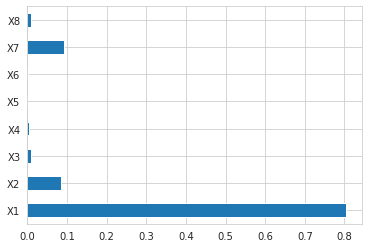

In [733]:
feature_imp = pd.Series(reg.feature_importances_, index=X_train.columns)
feature_imp.plot(kind='barh')
plt.show()

In [734]:
def parameters_val(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=0, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0):
  reg = DecisionTreeRegressor(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features, random_state=random_state, max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease, ccp_alpha=ccp_alpha) 
  reg.fit(X_train, Y_train)
  Y_pred = reg.predict(X_val)
  return mse(Y_pred,Y_val)

def parameters_train(criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0):
  reg = DecisionTreeRegressor(criterion=criterion, splitter=splitter, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features, random_state=random_state, max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease, ccp_alpha=ccp_alpha) 
  reg.fit(X_train, Y_train)
  Y_pred = reg.predict(X_train)
  return mse(Y_pred,Y_train)

In [735]:
splitter=['best', 'random']
for i in splitter:
  print(parameters_val(splitter=i))

# random split has less mse

0.4156155844155843
0.4342142857142856


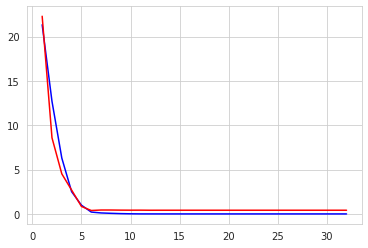

In [736]:
# tuning max_depth
max_depths = np.linspace(1, 32, 32, endpoint=True).tolist()

train_results = []
val_results = []
mse_train_results = []
mse_val_results =[]
for max_depth in max_depths:
   mse_train_results.append(parameters_train(max_depth=max_depth))
   mse_val_results.append(parameters_val(max_depth=max_depth))

plt.plot(max_depths,mse_train_results,'b')
plt.plot(max_depths,mse_val_results,'r')
plt.show()

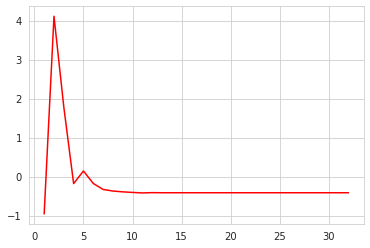

In [737]:
diff = [mse_train_results[i]-mse_val_results[i] for i in range(len(mse_train_results))]
plt.plot(max_depths,diff,'r')
plt.show()

# at the start, mse(train)>>mse(val) due to overfitting underfitting
# at around max_depth=5, mse(val)>>mse(train) due to overfitting
# if we see the features importance than Y depends majorly on any one of the inputs(80%)

21.335518828539737 22.294201321597196
12.696812902449167 8.585497703417794
6.301338458898999 4.517931884100649
2.507697932931171 2.688351068822561
0.9847135510956434 0.842752005535059
0.2088757742589342 0.386312254835677
0.10874624779229128 0.43962953316941855
0.06706143657242825 0.4388918182496604


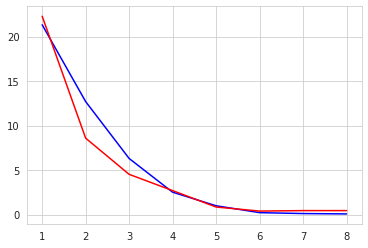

In [738]:
# MAX_DEPTH
depth = [j for j in range(1,9)]
train_mse_results = []
val_mse_results = []
for i in depth:
  print(parameters_train(max_depth=i),parameters_val(max_depth=i))
  train_mse_results.append(parameters_train(max_depth=i))
  val_mse_results.append(parameters_val(max_depth=i))

plt.plot(depth,train_mse_results,'b')
plt.plot(depth,val_mse_results,'r')
plt.show()

# max_depth=6 has the least error. Before and after that the error increases due to underfitting and overfitting

21.335518828539737 22.294201321597196
13.80071907393192 9.796109571133735
10.154129190993647 8.556802661170794
8.591615057317652 7.2450530841747804
7.304208006997396 6.595094271061242
6.200301835514643 5.384482403345299
5.428972476828313 5.526464514121404
4.710976788718803 4.783076864523491
4.012584402445857 4.611950642684107
3.49195276092431 3.9321593581466914
3.0235780220979196 3.1590376753864
2.6524997845400367 2.848395999651277
2.3933759379766273 2.665063015948398
2.1389855376041877 2.6533842913812986
1.8920841222492828 2.3626415227475146
1.6923433061341204 2.113462128749222
1.5100075615211914 1.9964075380044553
1.3311420440770672 1.810641750666967
1.1704993165376918 1.586704073129957
1.017501588009237 1.4228530286572496
0.8658310368289251 1.1553457511406495
0.7608948538864106 1.069456808787901
0.6743233396871557 0.9704245378361965
0.5920486567040928 0.9704245378361965
0.5249279462240598 0.9380177626187443
0.46631776943622927 0.827419601995087
0.42268235267008625 0.7270524166637987

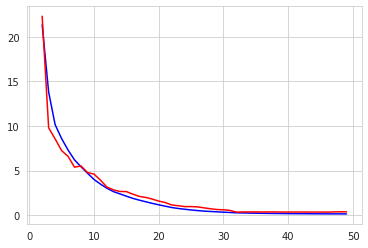

In [739]:
# MAX_LEAF_NODES
max_leaf_nodes = [j for j in range(2,50)]
train_mse_results = []
val_mse_results = []
for i in max_leaf_nodes:
  print(parameters_train(max_leaf_nodes=i),parameters_val(max_leaf_nodes=i))
  train_mse_results.append(parameters_train(max_leaf_nodes=i))
  val_mse_results.append(parameters_val(max_leaf_nodes=i))

plt.plot(max_leaf_nodes,train_mse_results,'b')
plt.plot(max_leaf_nodes,val_mse_results,'r')
plt.show()
# max_leaf_nodes around 25

21.33551882853974 22.294201321597196
13.80071907393192 9.796109571133735
10.154129190993645 8.556802661170794
8.591615057317652 7.2450530841747804
7.304208006997395 6.595094271061242
6.200301835514643 5.384482403345299
5.428972476828312 5.526464514121404
4.710976788718803 4.783076864523491
4.012584402445857 4.611950642684107
3.49195276092431 3.9321593581466914
3.0235780220979196 3.1590376753864
2.652499784540036 2.848395999651277
2.3933759379766273 2.665063015948398
2.1389855376041877 2.6533842913812986
1.8920841222492826 2.3626415227475146
1.6923433061341207 2.113462128749222
1.5100075615211914 1.9964075380044553
1.3311420440770672 1.810641750666967
1.1704993165376916 1.586704073129957
1.0175015880092368 1.4228530286572496
0.865831036828925 1.1553457511406495
0.7608948538864106 1.069456808787901
0.6743233396871556 0.9704245378361965
0.5920486567040928 0.9704245378361965
0.5249279462240597 0.938017762618744
0.46631776943622927 0.827419601995087
0.4226823526700863 0.7270524166637987
0.3

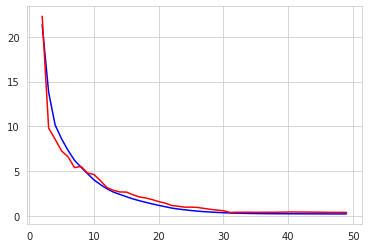

In [740]:
# MAX_LEAF_NODES using MAX_DEPTH that we got from above
max_leaf_nodes = [j for j in range(2,50)]
train_mse_results = []
val_mse_results = []
for i in max_leaf_nodes:
  print(parameters_train(max_leaf_nodes=i,max_depth=6),parameters_val(max_leaf_nodes=i,max_depth=6))
  train_mse_results.append(parameters_train(max_leaf_nodes=i,max_depth=6))
  val_mse_results.append(parameters_val(max_leaf_nodes=i,max_depth=6))

plt.plot(max_leaf_nodes,train_mse_results,'b')
plt.plot(max_leaf_nodes,val_mse_results,'r')
plt.show()
# max_leaf_nodes around 25

0.7608948538864106 1.069456808787901
1.8920841222492826 2.3626415227475146
2.6524997845400367 2.848395999651277
3.0235780220979196 3.1590376753864
3.49195276092431 3.9321593581466914
4.012584402445857 4.611950642684107
4.710976788718803 4.783076864523491
6.200301835514643 5.384482403345299
6.200301835514643 5.384482403345299
6.200301835514643 5.384482403345299


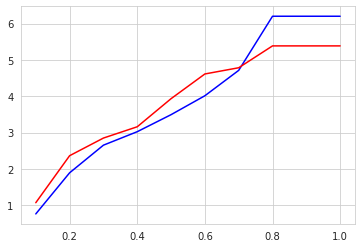

In [741]:
# MIN_IMPURITY_DECREASE
min_imp = [j/10 for j in range(1,11)]
train_mse_results = []
val_mse_results = []
for i in min_imp:
  print(parameters_train(min_impurity_decrease=i,max_depth=6,max_leaf_nodes=25),parameters_val(min_impurity_decrease=i,max_depth=6,max_leaf_nodes=25))
  train_mse_results.append(parameters_train(min_impurity_decrease=i,max_depth=6,max_leaf_nodes=25))
  val_mse_results.append(parameters_val(min_impurity_decrease=i,max_depth=6,max_leaf_nodes=25))

plt.plot(min_imp,train_mse_results,'b')
plt.plot(min_imp,val_mse_results,'r')
plt.show()
# min_impurity_decrease around 0.2

In [742]:
print("On training set :",parameters_train(max_depth=6,max_leaf_nodes=25,min_impurity_decrease=0.2))
print("On validation set :",parameters_val(max_depth=6,max_leaf_nodes=25,min_impurity_decrease=0.2))
print()

splitter_types = ['best','random']
for i in splitter_types:
  print("For splitter",i,"on training set :",parameters_train(splitter=i,max_depth=6,max_leaf_nodes=25,min_impurity_decrease=0.2))
  print("For splitter",i,"on validation set:",parameters_val(splitter=i,max_depth=6,max_leaf_nodes=25,min_impurity_decrease=0.2))

# splitter best has equal mse on both sets and is consistent
# splitter random has high error difference between validation set and training set, is unpredictable as it changes on every run

On training set : 1.8920841222492826
On validation set : 2.3626415227475146

For splitter best on training set : 1.8920841222492826
For splitter best on validation set: 2.3626415227475146
For splitter random on training set : 1.739086393720828
For splitter random on validation set: 1.7776809115172585


## 3)

In [743]:
# create a regressor  with previous parameters
reg_para = DecisionTreeRegressor(splitter='best',max_depth=6,max_leaf_nodes=25,min_impurity_decrease=0.2) 
  
# fit the regressor with X and Y data
reg_para.fit(X_train, Y_train)

Y_pred = reg_para.predict(X_val)

mse(Y_pred,Y_val)

2.3626415227475124

In [744]:
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score

q2_kf = KFold(n_splits=5, random_state=None)
mse_score = []

X_train_val = X_train.append(X_val, ignore_index = True)
Y_train_val = Y_train.append(Y_val, ignore_index = True)

print(len(X_train_val)/q2_df.shape[0])

for train_index , val_index in q2_kf.split(X):
    reg_para.fit(X_train_val,Y_train_val)
    pred_values = reg_para.predict(X_test)
     
    mse_score.append(mse(pred_values , Y_test))
     
avg_mse_score = sum(mse_score)/5
 
print('MSE of each fold - {}'.format(mse_score))
print('Avg MSE : {}'.format(avg_mse_score))

0.7994791666666666
MSE of each fold - [1.786532001533033, 1.786532001533033, 1.7865320015330337, 1.786532001533032, 1.7865320015330326]
Avg MSE : 1.7865320015330326


[Text(0.375, 0.9285714285714286, 'X[0] <= 0.75\nsquared_error = 101.754\nsamples = 614\nvalue = 22.411'),
 Text(0.14285714285714285, 0.7857142857142857, 'X[6] <= 0.175\nsquared_error = 6.953\nsamples = 305\nvalue = 13.391'),
 Text(0.07142857142857142, 0.6428571428571429, 'X[7] <= 0.5\nsquared_error = 5.772\nsamples = 114\nvalue = 11.452'),
 Text(0.03571428571428571, 0.5, 'squared_error = 2.696\nsamples = 18\nvalue = 7.632'),
 Text(0.10714285714285714, 0.5, 'X[0] <= 0.65\nsquared_error = 3.101\nsamples = 96\nvalue = 12.168'),
 Text(0.07142857142857142, 0.35714285714285715, 'squared_error = 1.479\nsamples = 37\nvalue = 14.091'),
 Text(0.14285714285714285, 0.35714285714285715, 'squared_error = 0.344\nsamples = 59\nvalue = 10.962'),
 Text(0.21428571428571427, 0.6428571428571429, 'X[0] <= 0.65\nsquared_error = 4.074\nsamples = 191\nvalue = 14.548'),
 Text(0.17857142857142858, 0.5, 'squared_error = 2.805\nsamples = 64\nvalue = 16.691'),
 Text(0.25, 0.5, 'X[6] <= 0.325\nsquared_error = 1.233\

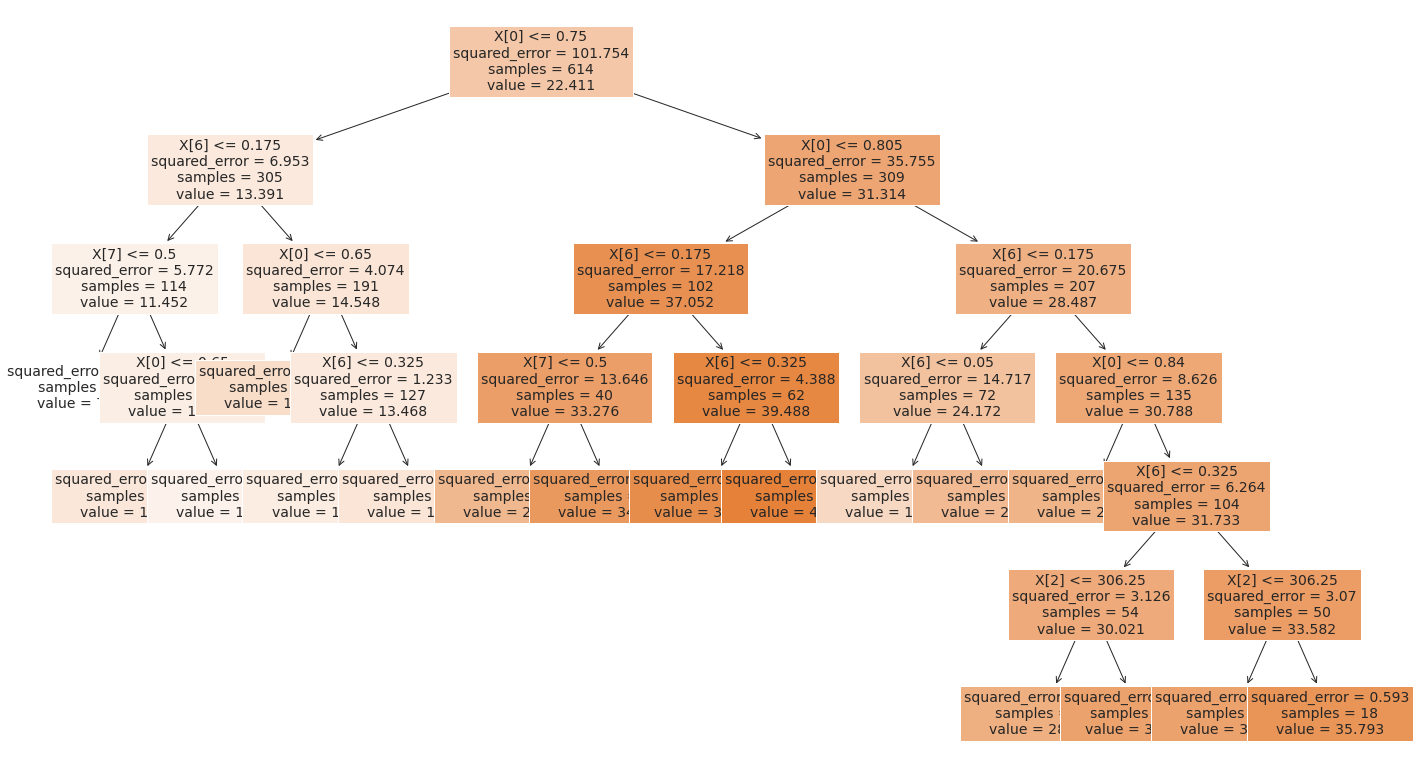

In [745]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(24,14))
plot_tree(reg_para, filled=True, fontsize=14)
